In [1]:
import pandas as pd

try:
    df = pd.read_csv('titanic.csv')
    print(df.shape)
    display(df.head())
except FileNotFoundError:
    print("Error: 'titanic.csv' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Check the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Identify the data types of each column
print("\nData types of each column:\n", df.dtypes)

# Calculate the number of missing values for each column
print("\nNumber of missing values per column:\n", df.isnull().sum())

Shape of the DataFrame: (891, 12)

Data types of each column:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Number of missing values per column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Percentage of missing values per column:
 PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Analyzing 'Age' column:


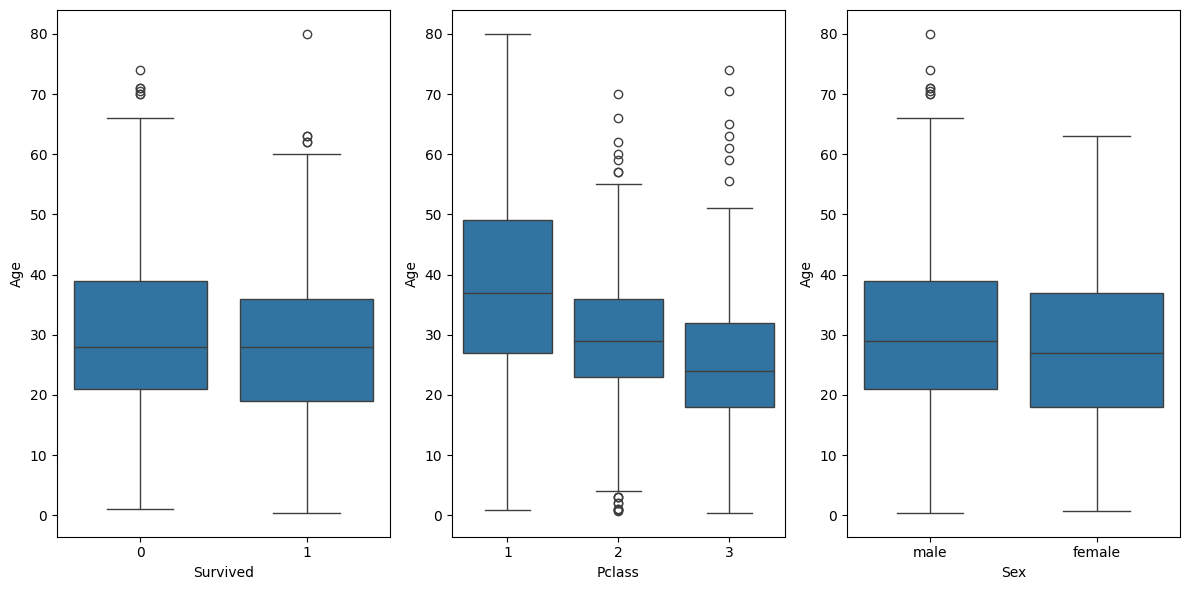


Analyzing 'Cabin' column:


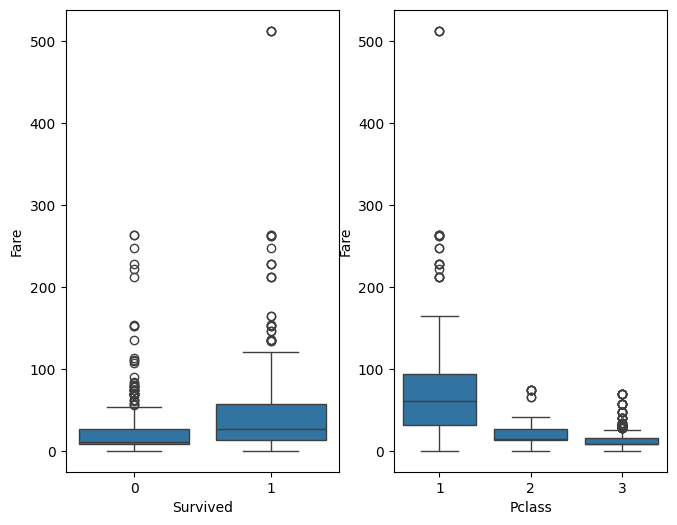


Analyzing 'Embarked' column:


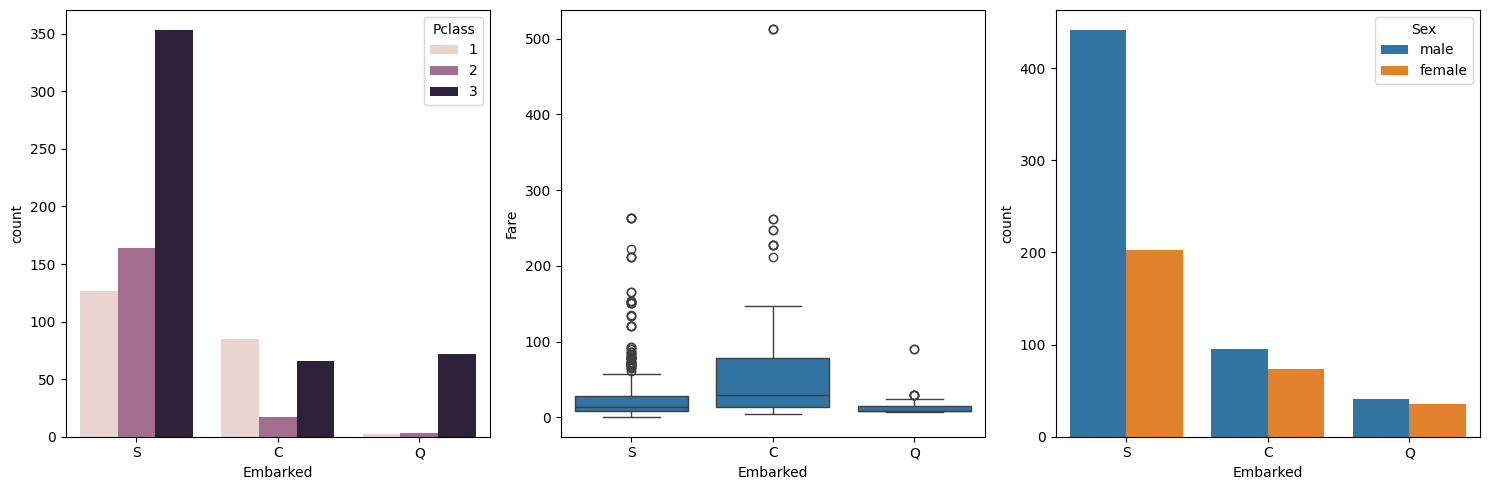

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().sum() * 100 / len(df)
print("Percentage of missing values per column:\n", missing_percentage)

# Analyze 'Age' column
print("\nAnalyzing 'Age' column:")
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='Survived', y='Age', data=df)
plt.subplot(1, 3, 2)
sns.boxplot(x='Pclass', y='Age', data=df)
plt.subplot(1, 3, 3)
sns.boxplot(x='Sex', y='Age', data=df)
plt.tight_layout()
plt.show()


# Analyze 'Cabin' column
print("\nAnalyzing 'Cabin' column:")
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='Survived', y='Fare', data=df)
plt.subplot(1, 3, 2)
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.show()

# Analyze 'Embarked' column
print("\nAnalyzing 'Embarked' column:")
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='Embarked', hue='Pclass', data=df)
plt.subplot(1, 3, 2)
sns.boxplot(x='Embarked', y='Fare', data=df)
plt.subplot(1, 3, 3)
sns.countplot(x='Embarked', hue='Sex', data=df)
plt.tight_layout()
plt.show()

In [4]:
# Impute missing 'Age' values using the median age for each passenger class
df['Age'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

# Impute missing 'Cabin' values with "Unknown"
df['Cabin'].fillna('Unknown', inplace=True)

# Impute missing 'Embarked' values with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Verify the imputation
print("Number of missing values after imputation:")
print(df[['Age', 'Cabin', 'Embarked']].isnull().sum())

# Print the first 10 rows to visually inspect the imputation
display(df.head(10))

Number of missing values after imputation:
Age         0
Cabin       0
Embarked    0
dtype: int64


<ipython-input-4-92384eec5e34>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna('Unknown', inplace=True)
<ipython-input-4-92384eec5e34>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Unknown,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,Unknown,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,Unknown,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,Unknown,C


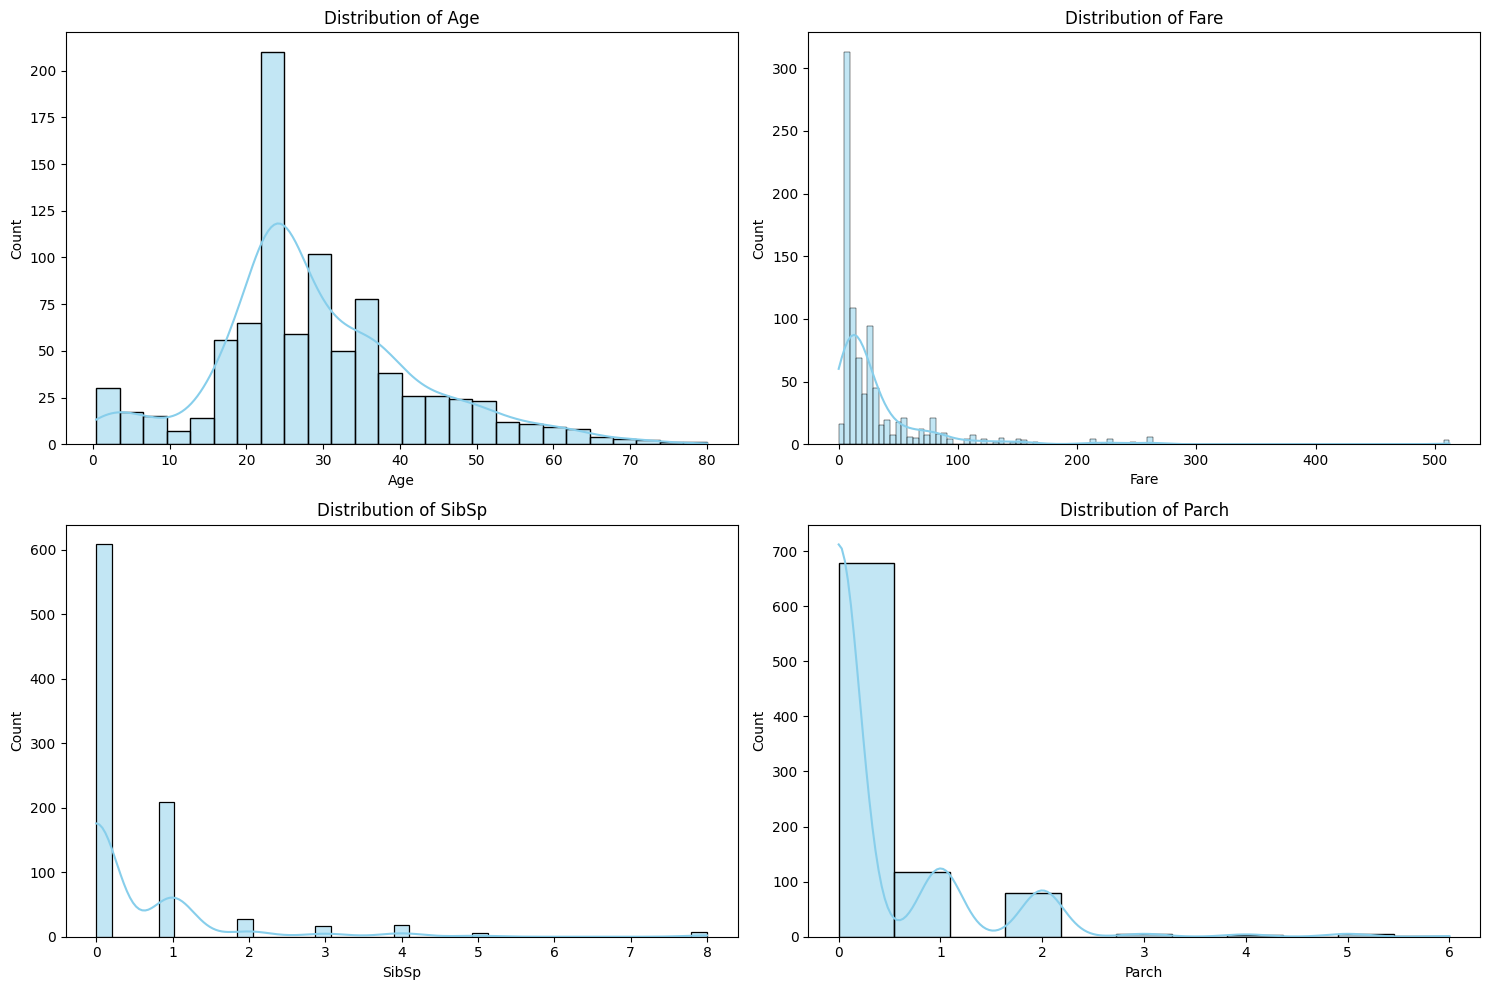

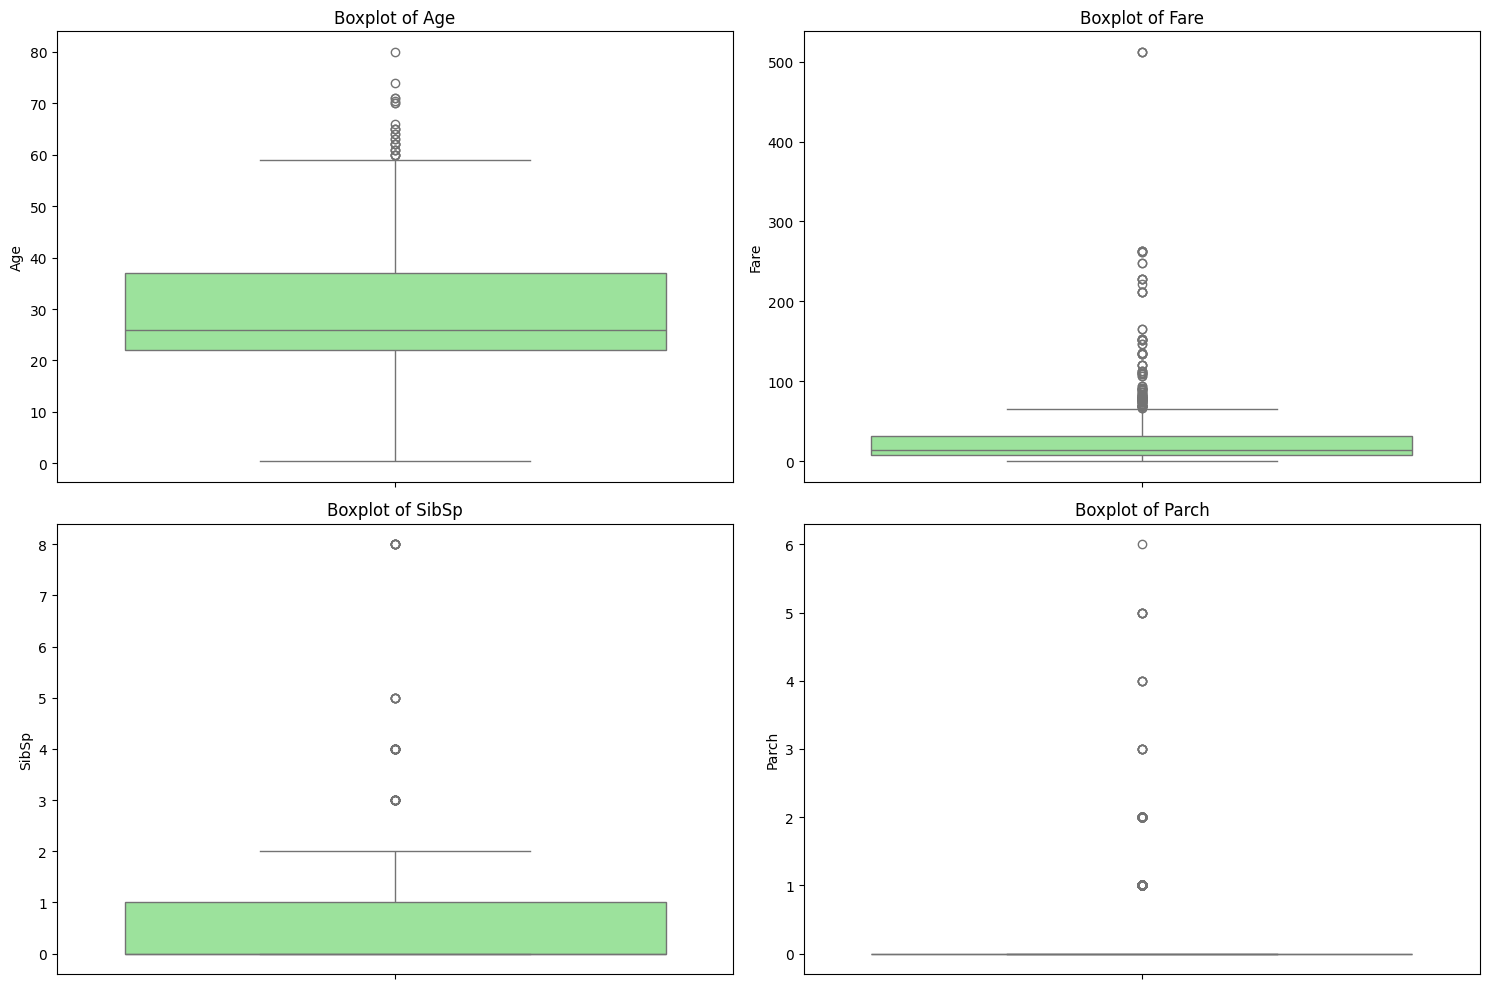

<ipython-input-5-ee816446a990>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")
<ipython-input-5-ee816446a990>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")
<ipython-input-5-ee816446a990>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


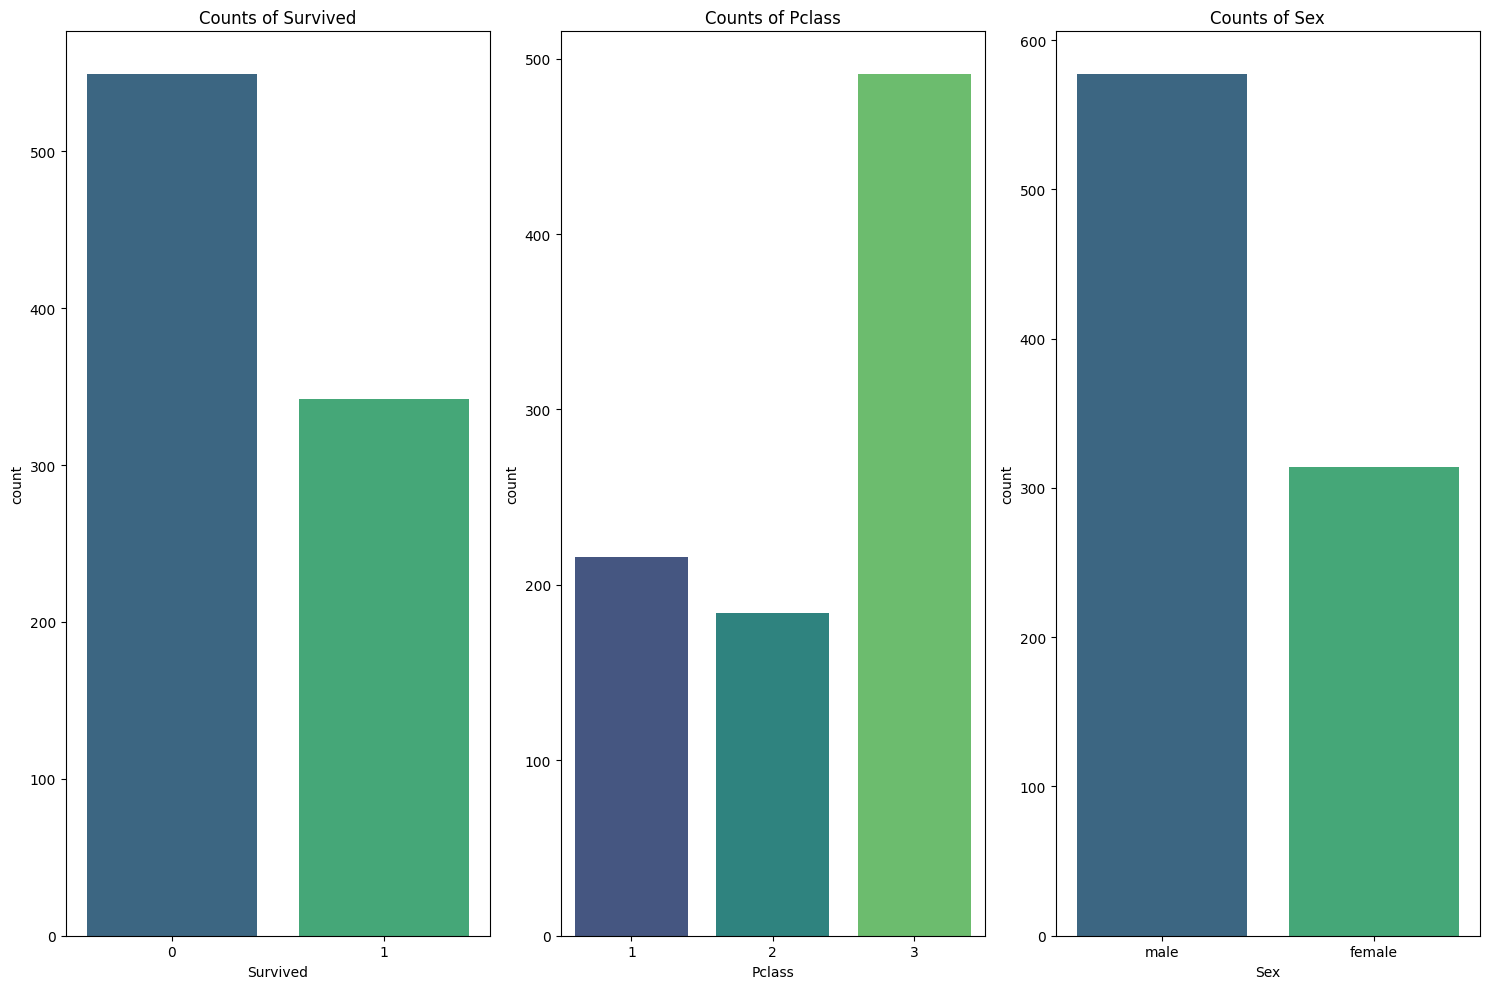

<ipython-input-5-ee816446a990>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Survived', data=df_survival_rate, palette='magma')
<ipython-input-5-ee816446a990>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Survived', data=df_survival_rate, palette='magma')


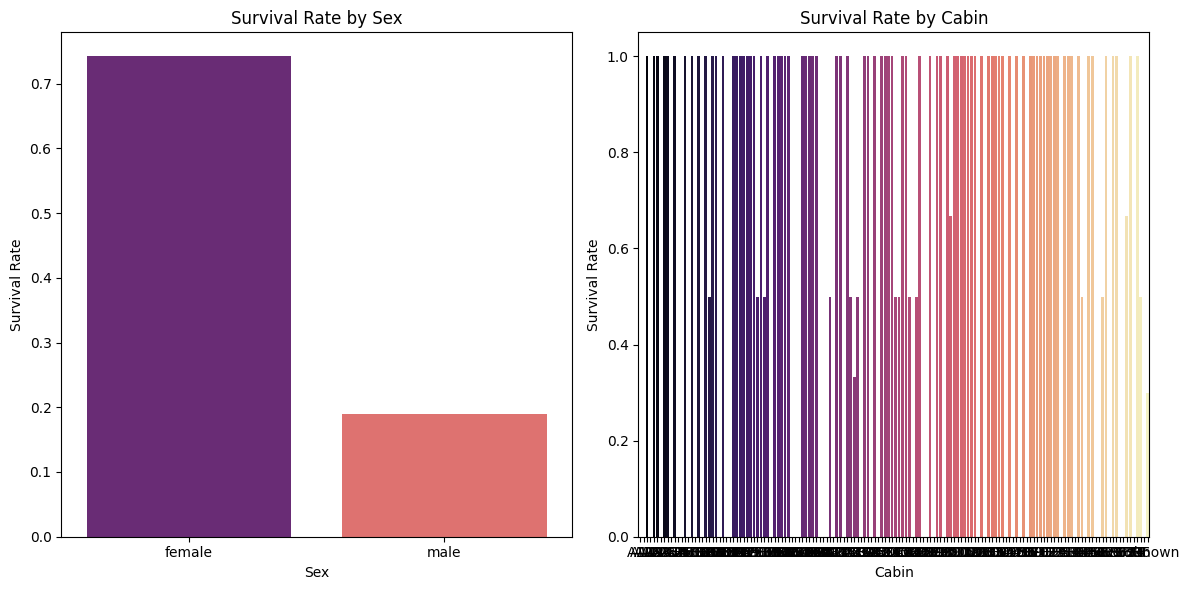

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical Features
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Categorical Features
categorical_features = ['Survived', 'Pclass', 'Sex', 'Embarked', 'Cabin']
plt.figure(figsize=(15, 10))

for i, col in enumerate(categorical_features[:3]):  # Survived, Pclass, Embarked
    plt.subplot(1, 3, i+1)
    sns.countplot(x=col, data=df, palette="viridis")
    plt.title(f'Counts of {col}')

plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
for i, col in enumerate(['Sex', 'Cabin']):
    plt.subplot(1, 2, i + 1)
    df_survival_rate = df.groupby(col)['Survived'].mean().reset_index()
    sns.barplot(x=col, y='Survived', data=df_survival_rate, palette='magma')
    plt.title(f'Survival Rate by {col}')
    plt.ylabel('Survival Rate')
plt.tight_layout()
plt.show()

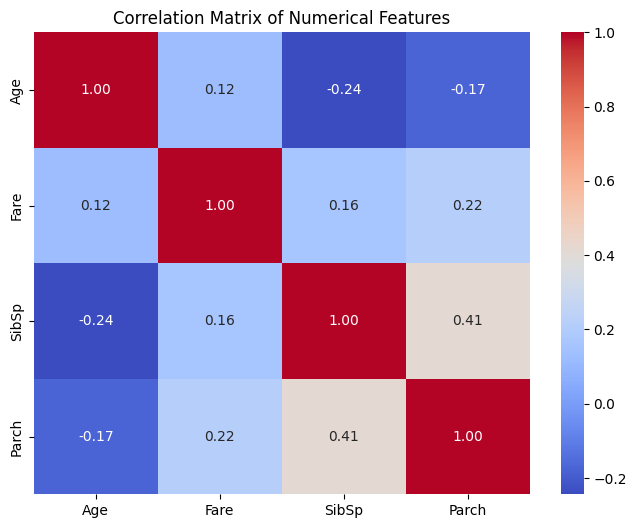


Survival rate by Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


<ipython-input-6-59edc82dac31>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Survived', data=df, palette='viridis')


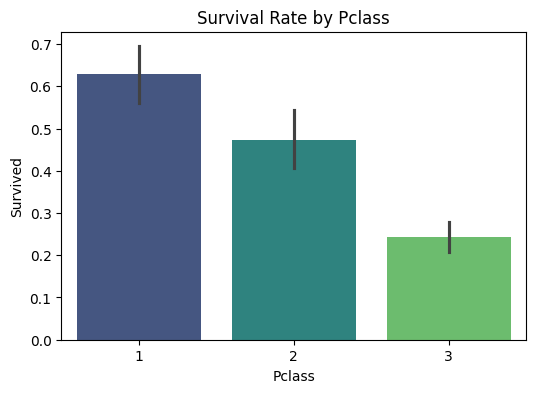


Survival rate by Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


<ipython-input-6-59edc82dac31>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Survived', data=df, palette='viridis')


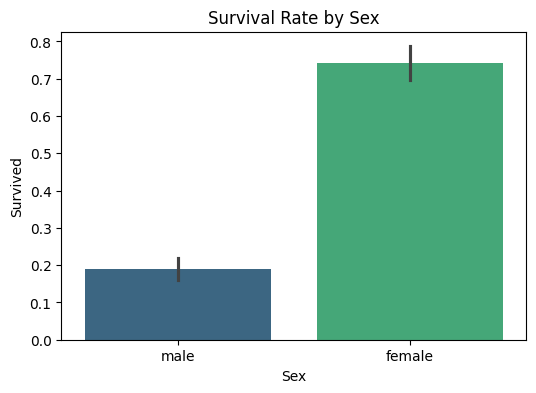


Survival rate by Embarked:
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


<ipython-input-6-59edc82dac31>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Survived', data=df, palette='viridis')


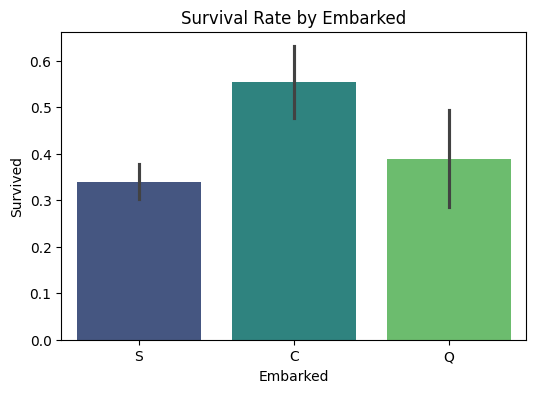

<ipython-input-6-59edc82dac31>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age_band', y='Survived', data=df, palette='magma')


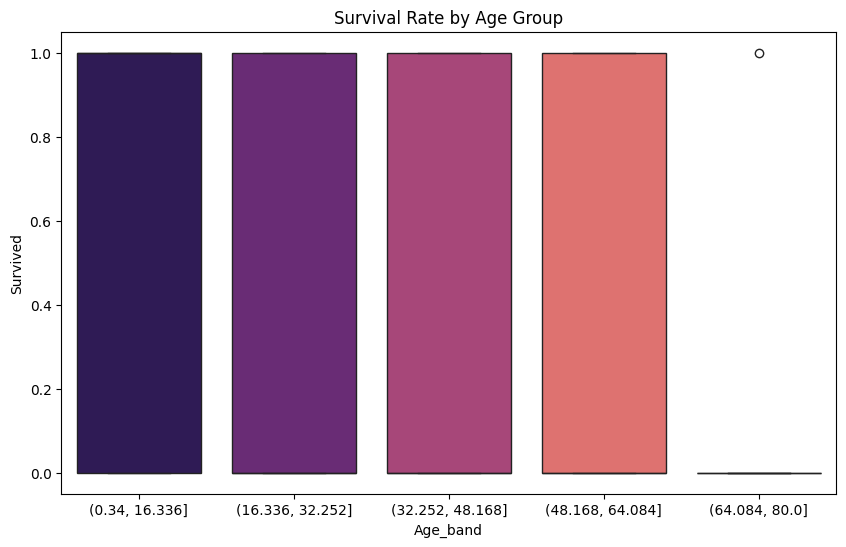

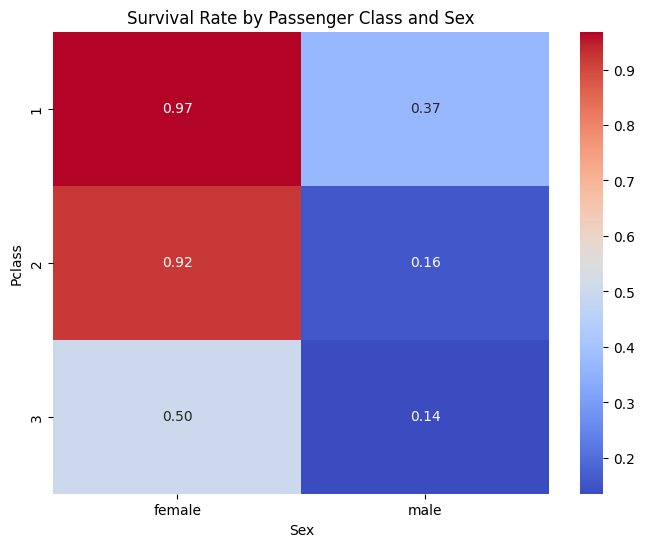

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix for numerical features
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Relationship between survival and other features
for col in ['Pclass', 'Sex', 'Embarked']:
    survival_rate = df.groupby(col)['Survived'].mean()
    print(f"\nSurvival rate by {col}:\n{survival_rate}")
    plt.figure(figsize=(6, 4))
    sns.barplot(x=col, y='Survived', data=df, palette='viridis')
    plt.title(f'Survival Rate by {col}')
    plt.show()

# Age analysis
plt.figure(figsize=(10, 6))
df['Age_band'] = pd.cut(df['Age'], bins=5)
sns.boxplot(x='Age_band', y='Survived', data=df, palette='magma')
plt.title('Survival Rate by Age Group')
plt.show()

# Combined categorical features
survival_rate_combined = df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()
plt.figure(figsize=(8, 6))
sns.heatmap(survival_rate_combined, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Survival Rate by Passenger Class and Sex')
plt.show()